# **Machine Learning Applications in Astronomy**

Machine learning techniques are increasingly used in astronomy for classification, regression, and prediction tasks. This week introduces three examples of machine learning applications:

1. Classification of stars using a decision tree-based algorithm (Random Forest)
2. Regression to predict galaxy mass from luminosity using Linear Regression
3. Neural network regression to estimate exoplanet radii from orbital parameters

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# **Stellar Classification using Decision Trees**

The Hertzsprung-Russell (H-R) diagram categorizes stars based on their **surface temperature** and **luminosity**. We use a **Random Forest Classifier**, a machine learning algorithm that builds multiple decision trees to classify stars as *hot* or *cool* based on their temperature.

**Concepts Used:**

* **Decision Trees:** The dataset is split into branches at each step based on feature conditions.
* **Random Forest:** A collection of decision trees improves accuracy and reduces overfitting.

**Implementation:**

* Generate synthetic temperature and luminosity data.
* Assign labels: Stars with `T > 6000K` are classified as *hot (1)* and others as *cool (0)*.
* Train a Random Forest Classifier and evaluate accuracy.

In [3]:
# Example 1: Stellar Classification using Decision Trees
# -------------------------------------------------------
# Hertzsprung-Russell Diagram Classification (simplified dataset)

# Generate synthetic data
np.random.seed(42)
temp = np.random.uniform(3000, 10000, 100)  # Surface temperature in Kelvin
luminosity = np.random.uniform(0.1, 100, 100)  # Luminosity in Solar units
labels = np.where(temp > 6000, 1, 0)  # Label stars as Hot (1) or Cool (0)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((temp, luminosity)), labels, test_size=0.2)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 100.00%


# **Regression - Predicting Galaxy Mass from Luminosity**

Galaxies follow a well-known mass-luminosity relation in logarithmic form:

\begin{align}
\log M = a \log L + b
\end{align}

where:

* M is the galaxy mass (M$_{\odot}$).
* L is the galaxy luminosity (L$_{\odot}$).
* a and b are constants determined by fitting the data.

Since luminosity and mass span many orders of magnitude, we perform the regression in log-log space using **Linear Regression**, a method that finds the best-fit line:

\begin{align}
y=mx+c
\end{align}

where:

* $y = log M$,
* $x = log L$,
* $m$ is the slope,
* $c$ is the intercept.

**Implementation:**

* Generate synthetic galaxy luminosity and mass data with added noise.
* Transform data using logarithm scaling.
* Split the data into training and testing sets.
* Train a Linear Regression model and evaluate its performance using Mean Squared Error (MSE):

\begin{align}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align}

where:

* $y_{i}$ are actual values,
* $\hat{y}_i$ are predicted values,
* n is the number of samples.



Mean Squared Error: 5.43e+24


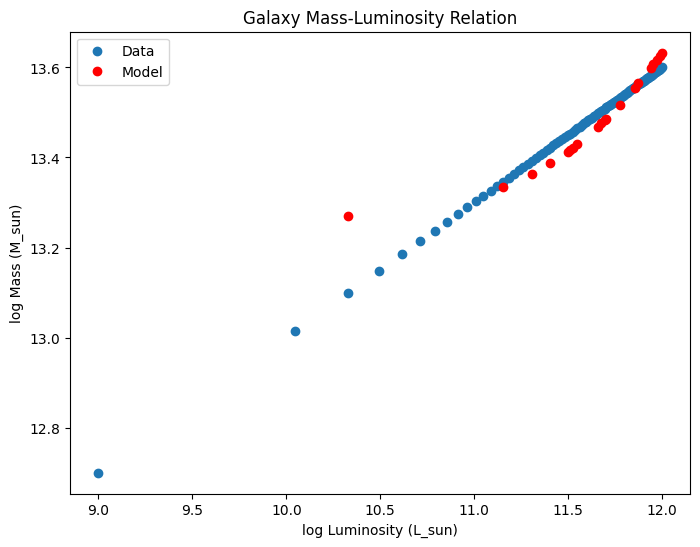

In [4]:
# Example 2: Regression - Predicting Galaxy Mass from Luminosity
# --------------------------------------------------------------
# Galaxy mass-luminosity relation (log-log scale follows a linear trend)

# Generate synthetic data
luminosity = np.linspace(1e9, 1e12, 100)  # Galaxy luminosities (L_sun)
mass = 10**(0.3 * np.log10(luminosity) + 10) + np.random.normal(0, 1e10, 100)  # Mass in solar masses

# Transform data
X_train, X_test, y_train, y_test = train_test_split(luminosity.reshape(-1, 1), mass, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2e}")

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(np.log10(luminosity), np.log10(mass), label='Data')
plt.plot(np.log10(X_test), np.log10(y_pred), 'o', color='red', label='Model')
plt.xlabel("log Luminosity (L_sun)")
plt.ylabel("log Mass (M_sun)")
plt.title("Galaxy Mass-Luminosity Relation")
plt.legend()
plt.show()

# **Neural Network Regression - Predicting Exoplanet Radii**

Neural networks are powerful tools for regression tasks, especially when relationships are non-linear. Here, we estimate exoplanet radii using orbital parameters:

\begin{align}
R \propto a^{0.5} P^{\frac{1}{3}}
\end{align}

where:

* R is the planet radius,
* a is the semi-major axis (AU),
* P is the orbital period (days).

A Multi-Layer Perceptron (MLP) Regressor is used, which consists of multiple layers of neurons to capture complex relationships.

**Implementation:**

* Generate synthetic data for exoplanet radii based on orbital parameters.
* Train an MLPRegressor (Neural Network) with hidden layers.
* Evaluate the model using Mean Squared Error (MSE).
* Plot actual vs. predicted exoplanet radii.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Mean Squared Error: 3.91e+00


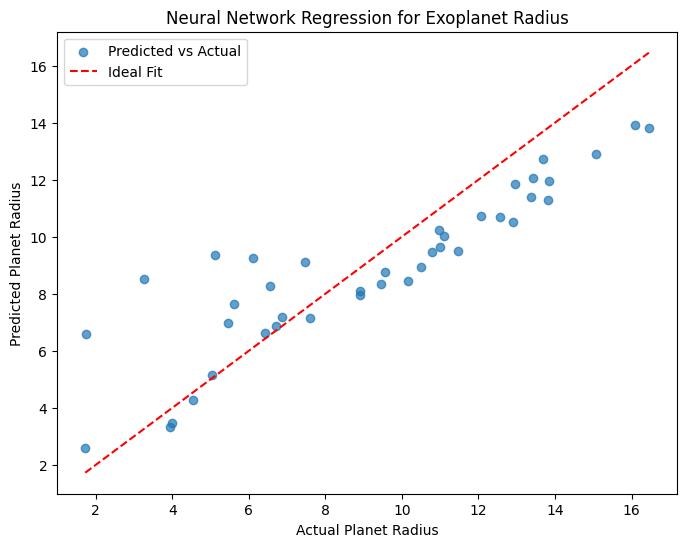

In [5]:
# Example 3: Neural Network - Predicting Exoplanet Radii from Orbital Features
# ---------------------------------------------------------------------------
# Synthetic dataset with planetary radii, semi-major axis, and orbital period
np.random.seed(42)
num_samples = 200
semi_major_axis = np.random.uniform(0.01, 5, num_samples)  # AU
orbital_period = np.random.uniform(0.5, 500, num_samples)  # Days
radii = (semi_major_axis ** 0.5) * (orbital_period ** (1/3)) + np.random.normal(0, 0.5, num_samples)  # Random noise

X = np.column_stack((semi_major_axis, orbital_period))
y = radii

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Neural Network Model
nn = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

# Evaluate and plot results
mse = mean_squared_error(y_test, y_pred)
print(f"Neural Network Mean Squared Error: {mse:.2e}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel("Actual Planet Radius")
plt.ylabel("Predicted Planet Radius")
plt.title("Neural Network Regression for Exoplanet Radius")
plt.legend()
plt.show()
